In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA
from scipy.fftpack import fft,fftshift,fftfreq,ifft
from scipy import signal

In [2]:
file = pd.read_csv('Raw_TrainTest_MultiTasks.csv')
df = pd.DataFrame(file)
df.head(3)

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,class_
0,4584.62,3902.05,4571.79,4589.23,4124.62,3825.13,4152.82,4579.49,4690.77,4260.00,4027.18,4385.13,4480.51,4230.77,2
1,4584.10,3895.90,4574.87,4567.69,4124.10,3827.18,4157.95,4585.13,4695.38,4268.21,4034.36,4380.00,4501.54,4197.44,2
2,4574.36,3893.85,4576.92,4572.82,4123.59,3829.23,4165.13,4590.26,4702.56,4281.54,4030.77,4366.67,4521.03,4176.41,2


1.Null Values present or not

2.Count the zeros in a column 


In [3]:
print(df.isnull().sum())
print("\n")
for i in range(len(df.columns)-1):
    print(df.columns[i],"    ",list(df[df.columns[i]]).count(0))
    

#The row value is equal to 0 is very less compaired to the total datapoints in the dataset

AF3       0
F7        0
F3        0
FC5       0
T7        0
P7        0
O1        0
O2        0
P8        0
T8        0
FC6       0
F4        0
F8        0
AF4       0
class_    0
dtype: int64


AF3      0
F7      0
F3      0
FC5      1
T7      0
P7      0
O1      0
O2      0
P8      1
T8      0
FC6      2
F4      0
F8      2
AF4      0


### Describe the DATAFRAME

In [4]:
des = df.drop('class_',axis=1).describe()

## 1. Making the x axes for plotting the signals
## 2. Plotting Indivitual signal with summery

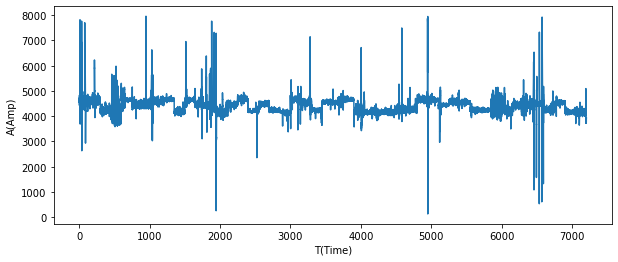

This is the signal of  AF3
summery 
count    921600.000000
mean       4396.392305
std         290.715947
min         131.800000
25%        4205.130000
50%        4435.380000
75%        4562.560000
max        7956.920000
Name: AF3, dtype: float64




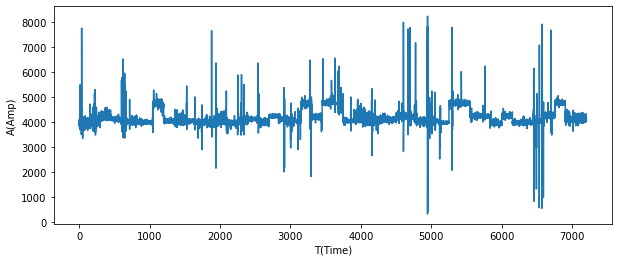

This is the signal of  F7
summery 
count    921600.000000
mean       4183.323943
std         321.424127
min         316.920000
25%        4004.620000
50%        4088.720000
75%        4235.380000
max        8244.100000
Name: F7, dtype: float64




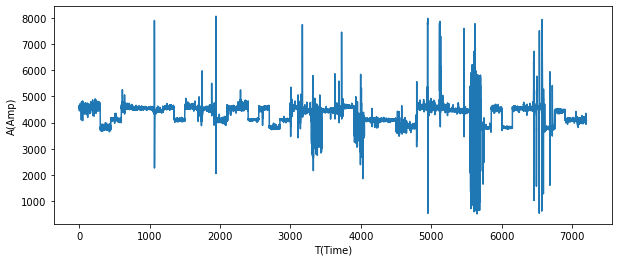

This is the signal of  F3
summery 
count    921600.000000
mean       4297.149236
std         399.677712
min         515.390000
25%        4086.150000
50%        4445.130000
75%        4557.440000
max        8055.380000
Name: F3, dtype: float64




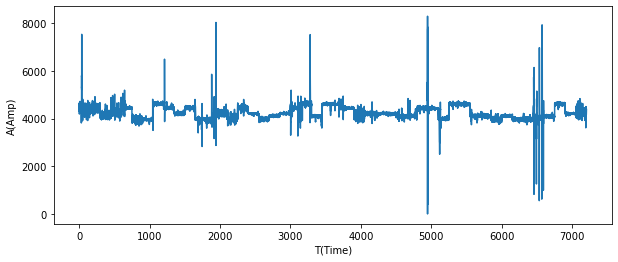

This is the signal of  FC5
summery 
count    921600.000000
mean       4240.231880
std         281.084762
min           0.000000
25%        4062.560000
50%        4195.380000
75%        4442.050000
max        8294.360000
Name: FC5, dtype: float64




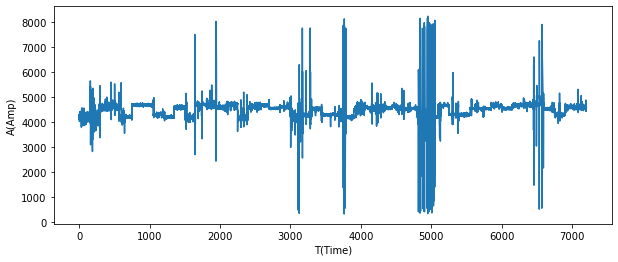

This is the signal of  T7
summery 
count    921600.000000
mean       4491.792683
std         429.748484
min         339.490000
25%        4306.670000
50%        4555.900000
75%        4644.620000
max        8247.180000
Name: T7, dtype: float64




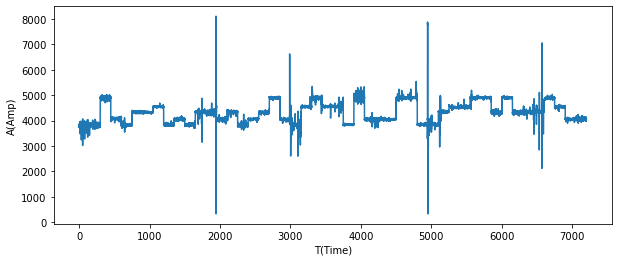

This is the signal of  P7
summery 
count    921600.000000
mean       4320.390818
std         389.986427
min         332.310000
25%        4038.460000
50%        4325.130000
75%        4555.900000
max        8100.510000
Name: P7, dtype: float64




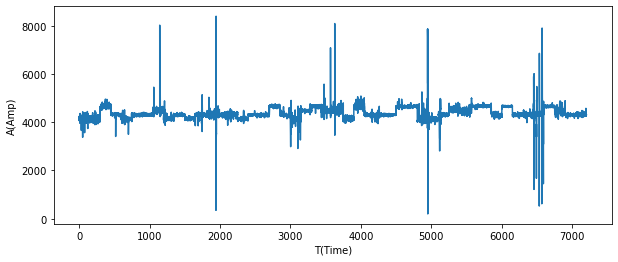

This is the signal of  O1
summery 
count    921600.000000
mean       4375.233787
std         237.950763
min         198.460000
25%        4266.150000
50%        4324.620000
75%        4520.000000
max        8394.870000
Name: O1, dtype: float64




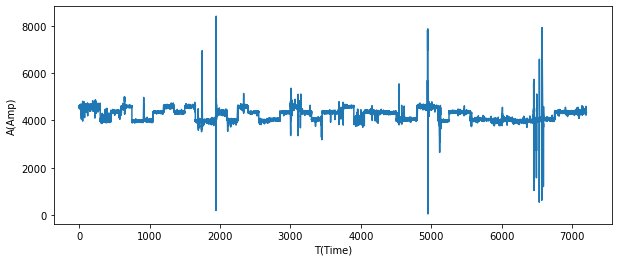

This is the signal of  O2
summery 
count    921600.000000
mean       4249.108602
std         279.718943
min          50.260000
25%        4018.460000
50%        4323.080000
75%        4381.030000
max        8401.540000
Name: O2, dtype: float64




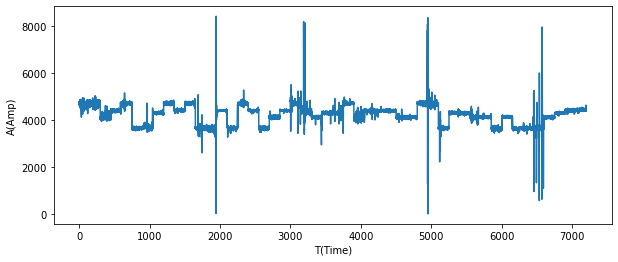

This is the signal of  P8
summery 
count    921600.000000
mean       4211.506438
std         393.762342
min           0.000000
25%        4065.130000
50%        4287.180000
75%        4414.870000
max        8401.540000
Name: P8, dtype: float64




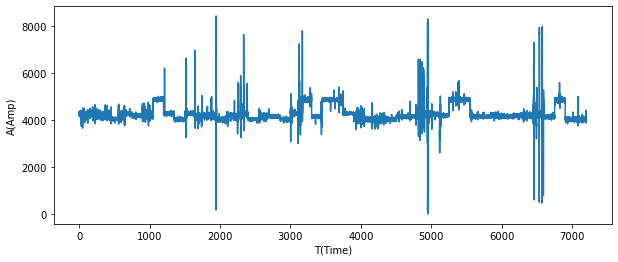

This is the signal of  T8
summery 
count    921600.000000
mean       4264.587209
std         317.515062
min          21.030000
25%        4104.620000
50%        4185.640000
75%        4284.100000
max        8401.540000
Name: T8, dtype: float64




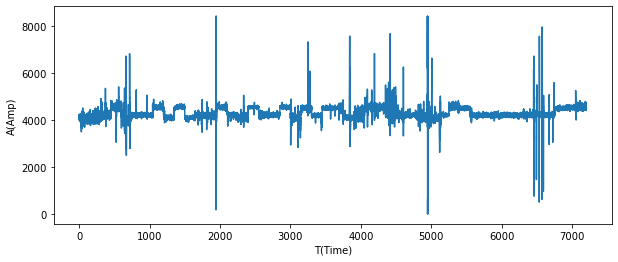

This is the signal of  FC6
summery 
count    921600.000000
mean       4288.100090
std         264.734835
min           0.000000
25%        4150.770000
50%        4217.950000
75%        4501.030000
max        8401.540000
Name: FC6, dtype: float64




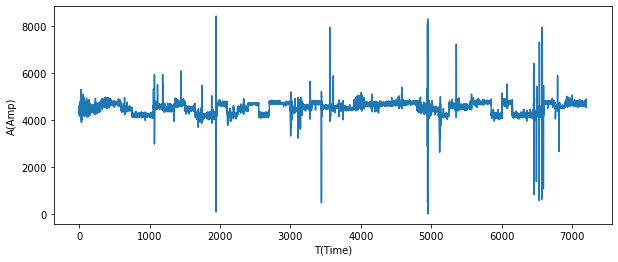

This is the signal of  F4
summery 
count    921600.000000
mean       4514.739572
std         258.364080
min           2.560000
25%        4378.970000
50%        4553.330000
75%        4695.380000
max        8401.540000
Name: F4, dtype: float64




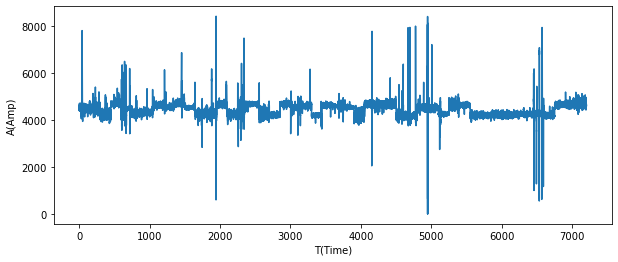

This is the signal of  F8
summery 
count    921600.000000
mean       4429.853094
std         288.672229
min           0.000000
25%        4225.130000
50%        4482.560000
75%        4618.970000
max        8401.540000
Name: F8, dtype: float64




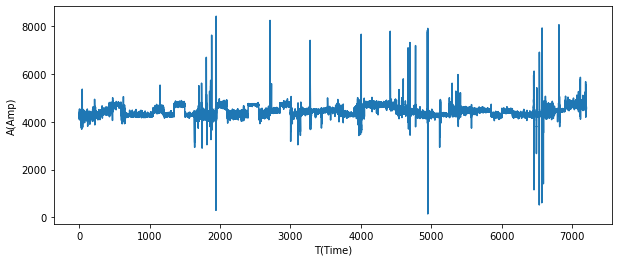

This is the signal of  AF4
summery 
count    921600.000000
mean       4426.844053
std         253.946556
min         148.210000
25%        4282.050000
50%        4404.620000
75%        4515.380000
max        8401.540000
Name: AF4, dtype: float64




In [5]:
x = np.arange(0,7200,(1/128))
for i in range(len(df.columns)-1):
    plt.figure(figsize=(10,4))
    # plot the i-th column
    plt.plot(x,df[df.columns[i]])
    plt.xlabel('T(Time)')
    plt.ylabel('A(Amp)')
    plt.show()
    print("This is the signal of ",df.columns[i])
    print("summery ")
    print(des[df.columns[i]])
    print("\n")

### Count plot over df----->'class'

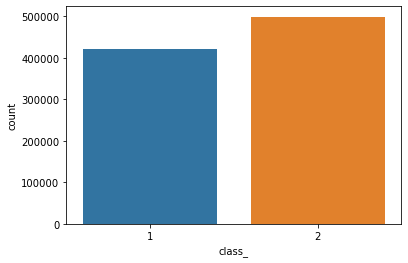

In [6]:

sns.countplot(x='class_',data=df)
plt.show()

#    *******COMMENT   ******
#    This shows that although No of data for class-2 > No of data for class-1
#    First few mins The subject perform SIMKAP(simultaneous capacity) Task (class-2) then perform No Task(class-1)

# Tasks - 1 (DATA PROCESSING)

### Applying ICA and then fit_and_transform the dataset

In [5]:
ica = FastICA()
df_ica = ica.fit_transform(df.drop('class_',axis=1))
df_ica = pd.DataFrame(df_ica,columns=df.columns[:-1])
# save the CSV file 
df_ica.to_csv('ica.csv')
# print the first 3 rows
df_ica.head(3)

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,-0.000975,-0.000587,-0.000358,0.001114,0.000229,0.000254,-0.001593,0.001306,0.000238,0.001135,0.000556,0.000099,-0.000113,-0.000209
1,-0.000833,-0.000610,-0.000563,0.001129,0.000359,0.000337,-0.001516,0.001281,0.000218,0.001184,0.000497,-0.000029,-0.000157,-0.000320
2,-0.000824,-0.000745,-0.000667,0.001161,0.000527,0.000320,-0.001589,0.001278,0.000186,0.001231,0.000535,-0.000107,-0.000186,-0.000476


### Plot the NOISE-FREE signals

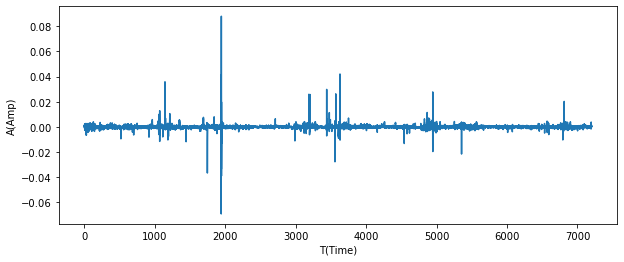

This is the signal of  AF3
summery 
count    9.216000e+05
mean    -3.339933e-18
std      1.041667e-03
min     -6.911616e-02
25%     -3.182429e-04
50%     -1.831234e-07
75%      3.230766e-04
max      8.791816e-02
Name: AF3, dtype: float64




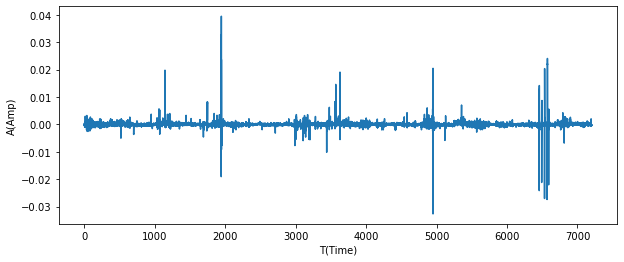

This is the signal of  F7
summery 
count    9.216000e+05
mean    -1.199592e-17
std      1.041667e-03
min     -3.267075e-02
25%     -1.962689e-04
50%     -1.305181e-05
75%      1.726633e-04
max      3.944313e-02
Name: F7, dtype: float64




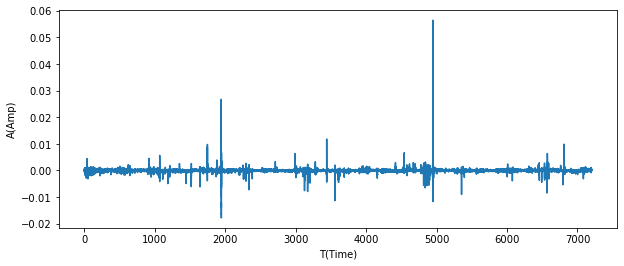

This is the signal of  F3
summery 
count    9.216000e+05
mean    -3.534863e-18
std      1.041667e-03
min     -1.778871e-02
25%     -1.608695e-04
50%     -1.398649e-05
75%      1.282006e-04
max      5.635292e-02
Name: F3, dtype: float64




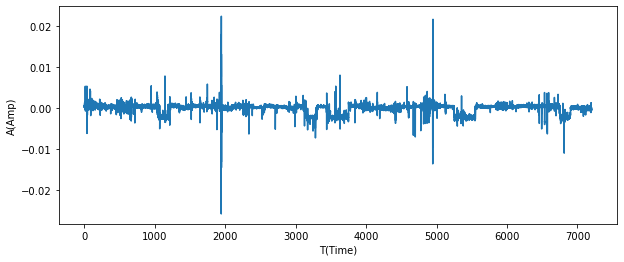

This is the signal of  FC5
summery 
count    9.216000e+05
mean    -1.046254e-17
std      1.041667e-03
min     -2.587897e-02
25%     -5.515633e-06
50%      3.519938e-04
75%      5.326337e-04
max      2.250661e-02
Name: FC5, dtype: float64




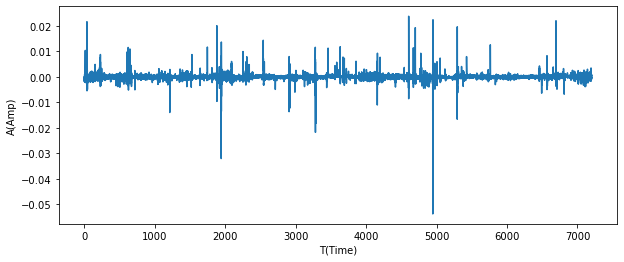

This is the signal of  T7
summery 
count    9.216000e+05
mean    -7.458166e-18
std      1.041667e-03
min     -5.381773e-02
25%     -2.507103e-04
50%     -1.712487e-05
75%      2.261289e-04
max      2.384405e-02
Name: T7, dtype: float64




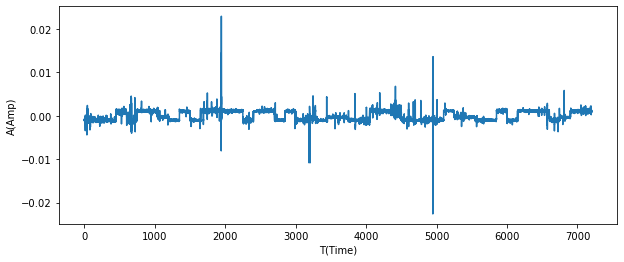

This is the signal of  P7
summery 
count    9.216000e+05
mean    -5.073934e-18
std      1.041667e-03
min     -2.262900e-02
25%     -9.972019e-04
50%     -3.162750e-04
75%      1.061807e-03
max      2.296769e-02
Name: P7, dtype: float64




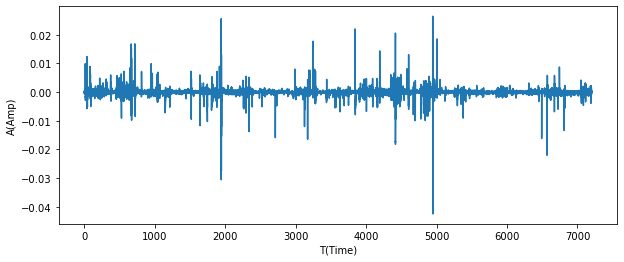

This is the signal of  O1
summery 
count    9.216000e+05
mean     9.160326e-19
std      1.041667e-03
min     -4.248943e-02
25%     -2.186275e-04
50%      6.787985e-06
75%      2.244035e-04
max      2.648476e-02
Name: O1, dtype: float64




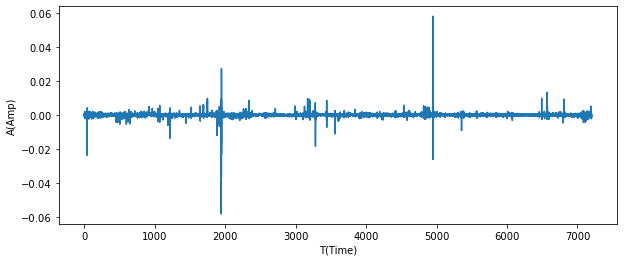

This is the signal of  O2
summery 
count    9.216000e+05
mean    -5.912340e-18
std      1.041667e-03
min     -5.837620e-02
25%     -1.980498e-04
50%      1.520674e-05
75%      2.245351e-04
max      5.813193e-02
Name: O2, dtype: float64




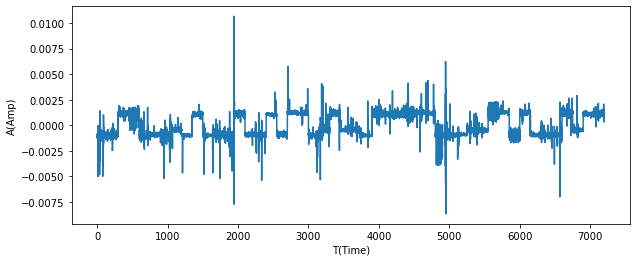

This is the signal of  P8
summery 
count    9.216000e+05
mean     1.088393e-17
std      1.041667e-03
min     -8.670785e-03
25%     -9.368802e-04
50%     -4.803027e-04
75%      1.133941e-03
max      1.066982e-02
Name: P8, dtype: float64




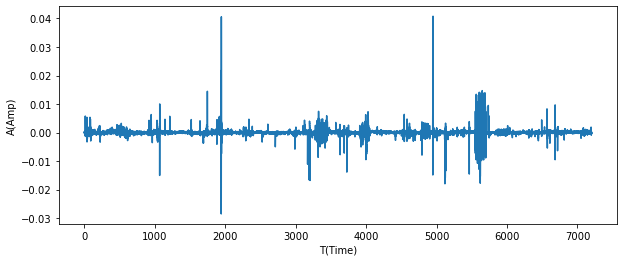

This is the signal of  T8
summery 
count    9.216000e+05
mean    -1.108712e-17
std      1.041667e-03
min     -2.855087e-02
25%     -1.533042e-04
50%      1.990878e-05
75%      2.000595e-04
max      4.078817e-02
Name: T8, dtype: float64




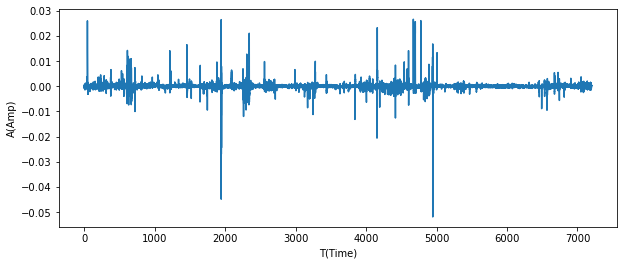

This is the signal of  FC6
summery 
count    9.216000e+05
mean     2.518565e-18
std      1.041667e-03
min     -5.188002e-02
25%     -2.062807e-04
50%     -9.688594e-07
75%      1.898271e-04
max      2.662814e-02
Name: FC6, dtype: float64




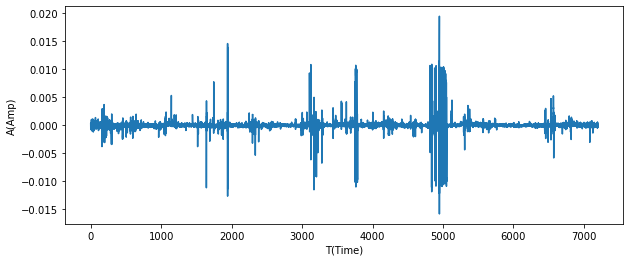

This is the signal of  F4
summery 
count    9.216000e+05
mean     2.229382e-18
std      1.041667e-03
min     -1.585891e-02
25%     -1.002696e-04
50%     -2.624226e-06
75%      1.107025e-04
max      1.950536e-02
Name: F4, dtype: float64




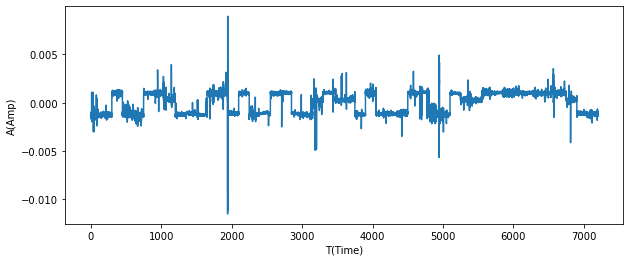

This is the signal of  F8
summery 
count    9.216000e+05
mean    -4.527370e-18
std      1.041667e-03
min     -1.150607e-02
25%     -1.141865e-03
50%      3.121952e-04
75%      1.011607e-03
max      8.956908e-03
Name: F8, dtype: float64




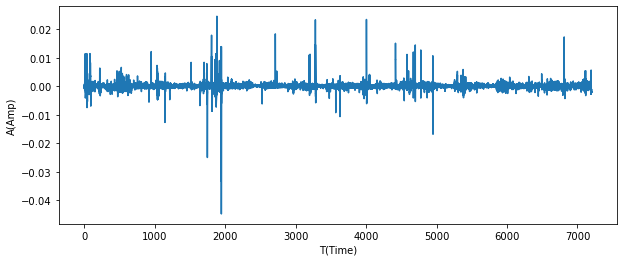

This is the signal of  AF4
summery 
count    9.216000e+05
mean     2.043375e-17
std      1.041667e-03
min     -4.473844e-02
25%     -2.274918e-04
50%      2.170413e-07
75%      2.046548e-04
max      2.454349e-02
Name: AF4, dtype: float64




In [8]:

des = df_ica.describe()

x = np.arange(0,7200,(1/128))

for i in range(len(df_ica.columns)):
    plt.figure(figsize=(10,4))
    
    # plot the i-th column
    plt.plot(x,df_ica[df_ica.columns[i]])
    plt.xlabel('T(Time)')
    plt.ylabel('A(Amp)')
    plt.show()
    print("This is the signal of ",df_ica.columns[i])
    print("summery ")
    print(des[df_ica.columns[i]])
    print("\n")

In [6]:
b,a = signal.butter(10,0.5*(2*np.pi),btype='highpass',analog=True,output='ba')
w,h = signal.freqs(b,a,worN=df.shape[0])

## plotting the fft (after passing through a HIGHPASS FILTER with 0.5Hz) of the indivitual signal(Total signal present 14)

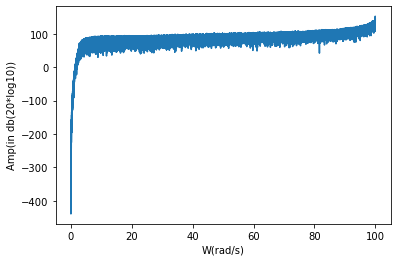

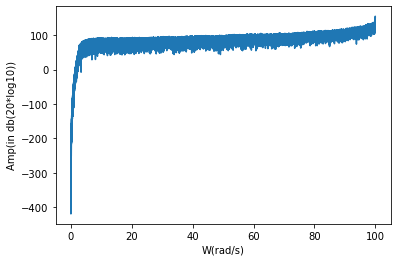

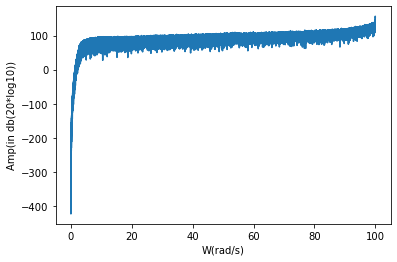

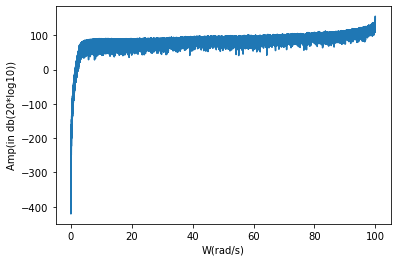

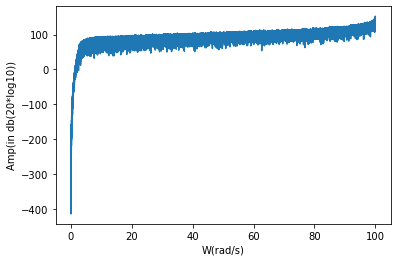

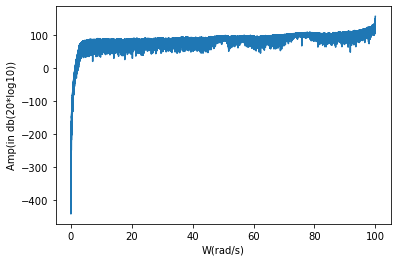

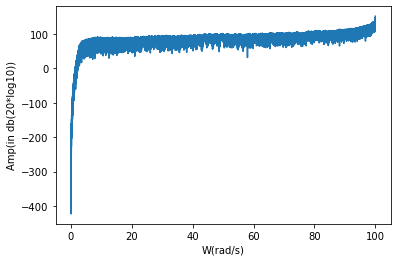

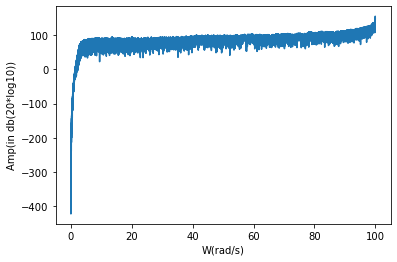

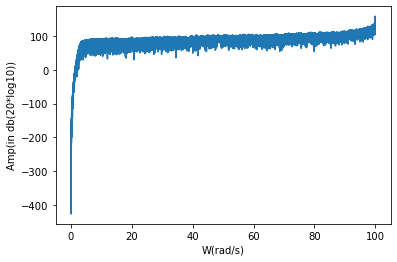

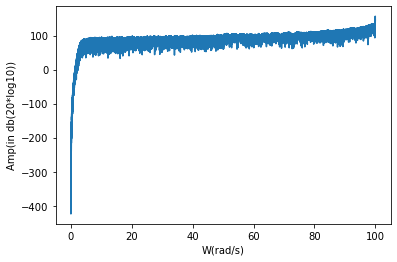

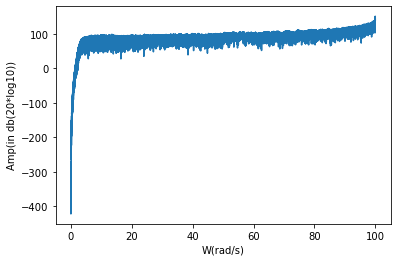

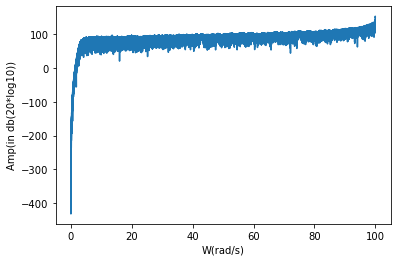

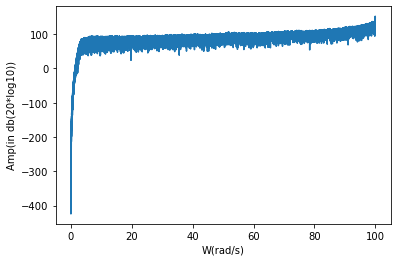

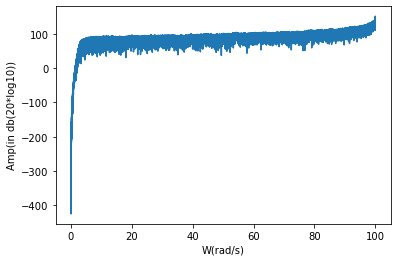

In [8]:
for i in range(len(df_ica.columns)):    
    y = np.abs(fft((np.array(df[df.columns[i]])))*h)
    plt.plot(w,20*np.log10(y))
    plt.xlabel("W(rad/s)")
    plt.ylabel("Amp(in db(20*log10))")
    plt.show()

# TASK - 2(Division of The EEG into 5 Bands)

### 1. Creating the 5 BAND PASS Filter

In [10]:
filter_ = []
w_ = []

b,a = signal.butter(10,[0.5*(2*np.pi),3*(2*np.pi)],btype='bandpass',analog=True,output='ba')
w,h = signal.freqs(b,a,worN=df.shape[0])
filter_.append(h)
w_.append(w)

b,a = signal.butter(10,[3*(2*np.pi),8*(2*np.pi)],btype='bandpass',analog=True,output='ba')
w,h = signal.freqs(b,a,worN=df.shape[0])
filter_.append(h)
w_.append(w)

b,a = signal.butter(10,[8*(2*np.pi),12*(2*np.pi)],btype='bandpass',analog=True,output='ba')
w,h = signal.freqs(b,a,worN=df.shape[0])
filter_.append(h)
w_.append(w)

b,a = signal.butter(10,[12*(2*np.pi),38*(2*np.pi)],btype='bandpass',analog=True,output='ba')
w,h = signal.freqs(b,a,worN=df.shape[0])
filter_.append(h)
w_.append(w)

b,a = signal.butter(10,[38*(2*np.pi),45*(2*np.pi)],btype='bandpass',analog=True,output='ba')
w,h = signal.freqs(b,a,worN=df.shape[0])
filter_.append(h)
w_.append(w)


### 2. visualize the freq responce (TransferFunction vs Angular Freq) of The Filter

Filter used to extract for Delta Band


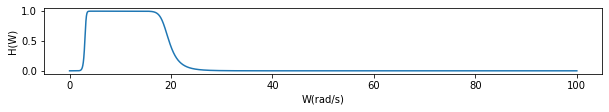

Filter used to extract for Theta Band


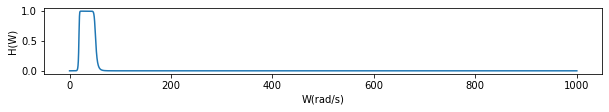

Filter used to extract for Alpha Band


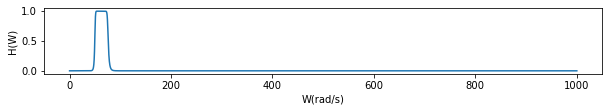

Filter used to extract for Beta Band


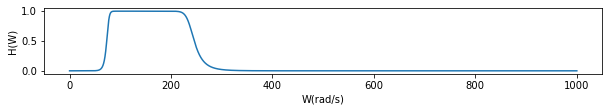

Filter used to extract for Gamma Band


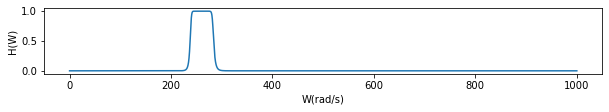

In [11]:
for i in range(5):
    plt.figure(figsize=(10,7))
    plt.subplot(5,1,i+1)
    plt.plot(w_[i],np.abs(filter_[i]))
    plt.xlabel('W(rad/s)')
    plt.ylabel('H(W)')
    if i==0:
        print("Filter used to extract for Delta Band")
    elif i==1:
        print("Filter used to extract for Theta Band")
    elif i==2:
        print("Filter used to extract for Alpha Band")
    elif i==3:
        print("Filter used to extract for Beta Band")
    elif i==4:
        print("Filter used to extract for Gamma Band")
    plt.show()

### 1.  Apply these Filters to the signal
### 2.  Save these records to 5 CSV files

In [11]:
ans_delta = pd.DataFrame()
ans_theta = pd.DataFrame()
ans_alpha = pd.DataFrame()
ans_beta = pd.DataFrame()
ans_gamma = pd.DataFrame()

for i in range(len(df_ica.columns)):
    y = np.array(df_ica[df_ica.columns[i]])
    fft_y = fft(y)
    for j in range(5):
        ans = []
        ans=fft_y * filter_[j]
            
        ans = pd.DataFrame(np.abs(ifft(ans)),columns=[df_ica.columns[i]])
        
        if j==0:
            ans_delta = pd.concat([ans_delta,ans],axis=1)
        elif j==1:
            ans_theta = pd.concat([ans_theta,ans],axis=1)
        elif j==2:
            ans_alpha = pd.concat([ans_alpha,ans],axis=1)
        elif j==3:
            ans_beta = pd.concat([ans_beta,ans],axis=1)
        elif j==4:
            ans_gamma = pd.concat([ans_gamma,ans],axis=1)

            

ans_alpha.to_csv('alpha.csv')
ans_beta.to_csv('beta.csv')
ans_gamma.to_csv('gamma.csv')
ans_delta.to_csv('delta.csv')
ans_theta.to_csv('theta.csv')